<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/TechnicalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
pip install ta

  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28716 sha256=984f97573fb1482a077590dbf9b4349b6e3f9fc11e9082041d01ad69c9bd962b
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


In [94]:
import pandas as pd
from ta.utils import dropna
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.trend import EMAIndicator
from ta.trend import MACD
from ta.volume import ForceIndexIndicator
import pandas_datareader as web
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [95]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2010-01-01', end='2021-03-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136
...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998


In [96]:
# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()


In [97]:
df

,High,Low,Open,Close,Volume,Adj Close,bb_bbm,bb_bbh,bb_bbl
Date,,,,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586,NaN,NaN,NaN
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968,NaN,NaN,NaN
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066,NaN,NaN,NaN
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067,NaN,NaN,NaN
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001,134.2885,142.948565,125.628436
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998,133.3980,141.887017,124.908983
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998,132.3445,141.477387,123.211613


In [98]:
# Relative Strength Index (RSI)
Relative_Strength_Index = RSIIndicator(close=df["Close"], window = 14, fillna = False)
df['RSI'] = Relative_Strength_Index.rsi() 
df

,High,Low,Open,Close,Volume,Adj Close,bb_bbm,bb_bbh,bb_bbl,RSI
Date,,,,,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586,NaN,NaN,NaN,NaN
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968,NaN,NaN,NaN,NaN
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066,NaN,NaN,NaN,NaN
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067,NaN,NaN,NaN,NaN
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001,134.2885,142.948565,125.628436,35.088983
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998,133.3980,141.887017,124.908983,34.280192
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998,132.3445,141.477387,123.211613,28.279096


In [99]:
# EMA - Exponential Moving Average
ema = EMAIndicator(close=df["Close"], window = 14, fillna = False)
df['EMA'] = ema.ema_indicator() 
df

,High,Low,Open,Close,Volume,Adj Close,bb_bbm,bb_bbh,bb_bbl,RSI,EMA
Date,,,,,,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968,NaN,NaN,NaN,NaN,NaN
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066,NaN,NaN,NaN,NaN,NaN
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067,NaN,NaN,NaN,NaN,NaN
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001,134.2885,142.948565,125.628436,35.088983,131.574904
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998,133.3980,141.887017,124.908983,34.280192,130.744917
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998,132.3445,141.477387,123.211613,28.279096,129.444261


In [100]:
# Moving Average Convergence Divergence (MACD)
M_A_C_D = MACD(close=df["Close"],window_fast=12, window_slow=26, window_sign=9, fillna = False)
df['MACD'] = M_A_C_D.macd()
df

,High,Low,Open,Close,Volume,Adj Close,bb_bbm,bb_bbh,bb_bbl,RSI,EMA,MACD
Date,,,,,,,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001,134.2885,142.948565,125.628436,35.088983,131.574904,-1.166523
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998,133.3980,141.887017,124.908983,34.280192,130.744917,-1.543530
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998,132.3445,141.477387,123.211613,28.279096,129.444261,-2.169122


In [101]:
# Force Index (FI)
FI = ForceIndexIndicator(close = df['Close'], volume = df['Volume'] , fillna = False)
df['FI'] = FI.force_index() 
df

,High,Low,Open,Close,Volume,Adj Close,bb_bbm,bb_bbh,bb_bbl,RSI,EMA,MACD,FI
Date,,,,,,,,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001,134.2885,142.948565,125.628436,35.088983,131.574904,-1.166523,-9.673329e+07
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998,133.3980,141.887017,124.908983,34.280192,130.744917,-1.543530,-9.100433e+07
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998,132.3445,141.477387,123.211613,28.279096,129.444261,-2.169122,-1.703108e+08


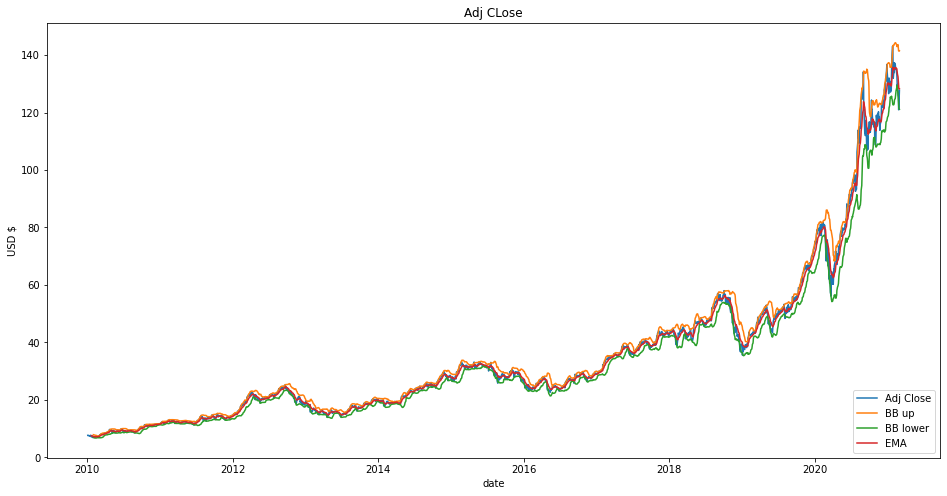

In [103]:
plt.figure(figsize=(16,8))
plt.title ('Adj CLose')
plt.plot(df['Close'])
plt.plot(df['bb_bbh'])
plt.plot(df['bb_bbl'])
plt.plot(df['EMA'])
plt.xlabel('date')
plt.ylabel('USD $')
plt.legend(['Adj Close', 'BB up', 'BB lower', 'EMA'],loc='lower right',)
plt.show()

https://readthedocs.org/projects/technical-analysis-library-in-python/downloads/pdf/latest/